**Titanic Survival Prediction Project-Giriraju B**


Import Data from csv file

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [224]:
df=pd.read_csv('/content/Titanic Data set.csv')

In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [227]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data wrangling

In [228]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [229]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [230]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [231]:
df.drop(columns=['Cabin'], inplace=True)

In [232]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [233]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [234]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [235]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

So we can understand all the males died on saving females,lol!! 😀

In [236]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

**Data visualization**

In [237]:
sns.set()

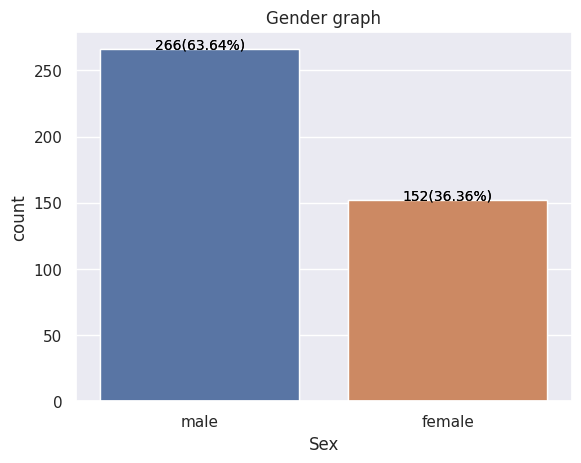

In [238]:
sns.countplot(x='Sex',data=df)
plt.title('Gender graph')

ax = sns.countplot(x='Sex', data=df)


total = len(df['Sex'])
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(f'{int(count)}({percentage:.2f}%)', (x, y), ha='center', fontsize=10, color='black')


plt.title('Gender graph')


plt.show()

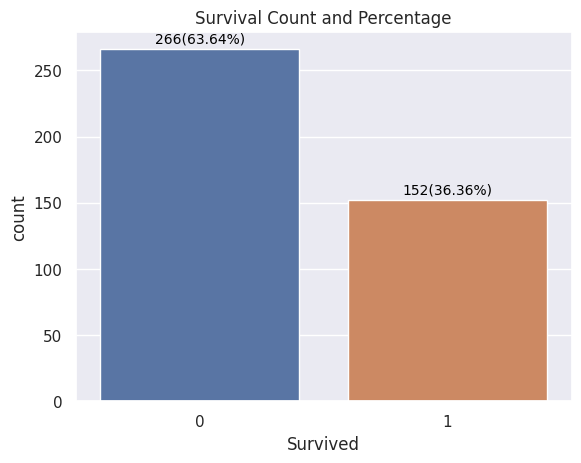

In [239]:
ax = sns.countplot(x='Survived', data=df)


total = len(df['Survived'])
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(f'{int(count)}({percentage:.2f}%)', (x, y), ha='center', fontsize=10, color='black')

plt.title('Survival Count and Percentage')

plt.show()

<ipython-input-240-f1b15da63cbd>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plt.pie(class_counts, labels=[f'Class {i} ({count})' for i, count in class_counts.iteritems()], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))


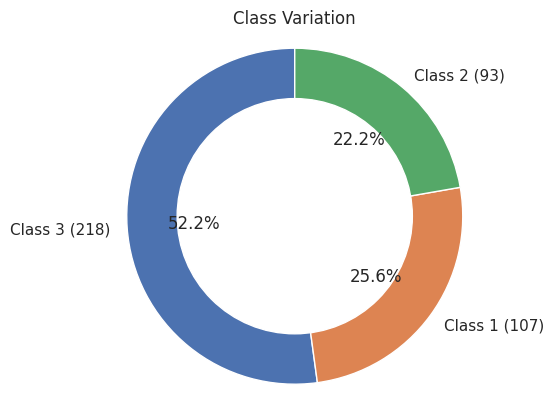

In [240]:
class_counts = df['Pclass'].value_counts()


plt.pie(class_counts, labels=[f'Class {i} ({count})' for i, count in class_counts.iteritems()], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Class Variation')

plt.show()

<ipython-input-241-1fc3ed409439>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


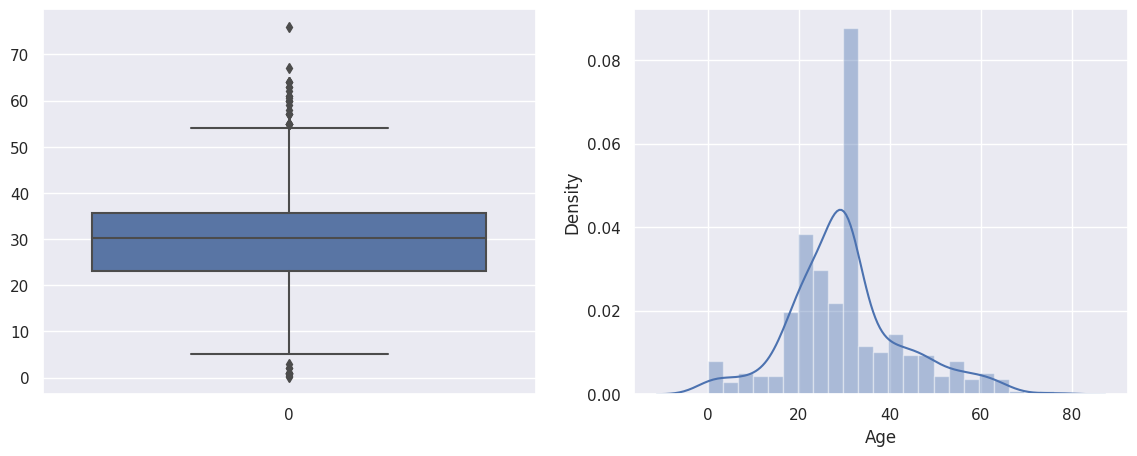

<ipython-input-241-1fc3ed409439>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


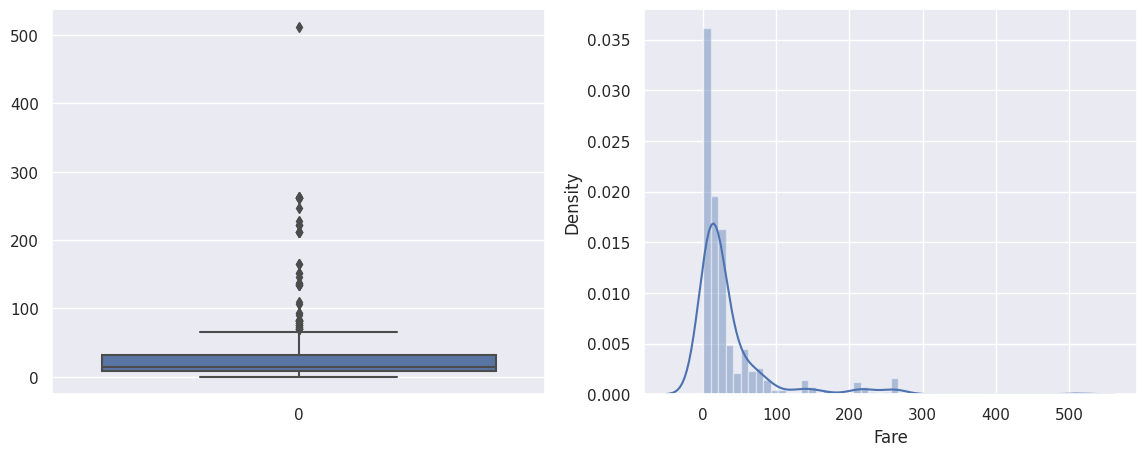

In [241]:
Age_Fare = ['Age', 'Fare']
for column in Age_Fare:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()



*   In the 'Age' variable, there are some outliers present. The distribution of
ages indicates that the majority of passengers fell within the age range of 20 to 40 years old.


*   Regarding the 'Fare' variable, it exhibits several outliers, suggesting that there were passengers who paid significantly higher fares. Additionally, the distribution of fares is right-skewed, indicating that the majority of passengers paid lower fares, with a few paying much higher amounts.



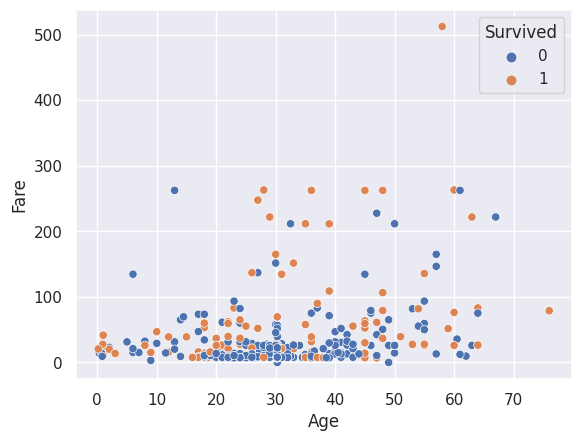

In [242]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

The scatterplot shows that the passengers with high fares had more chance of survival

**To count & Visualise by Survived by people**

Survived by Gender

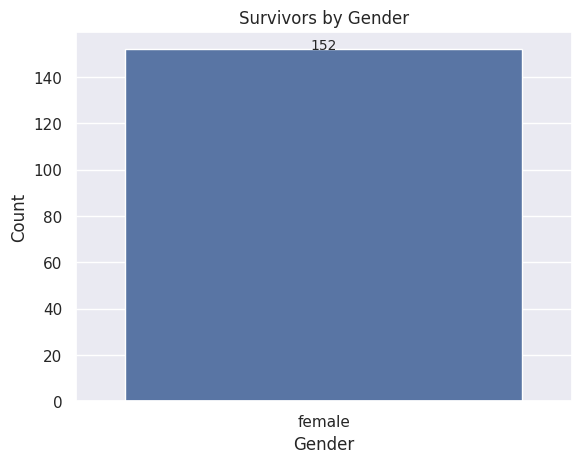

In [243]:
ax = sns.countplot(x='Sex', data=df[df['Survived'] == 1])
total_survived = len(df[df['Survived'] == 1])

for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(f'{int(count)}', (x, y), ha='center', fontsize=10)

plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


So, by the above graph you can see only females are alive in the titanic accident.By this we can confirm they followed "Womens and children first" if *an* accident occurs!!

Survived by Pclass

<ipython-input-244-32ea0026edd4>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plt.pie(survived_by_pclass, labels=[f'Pclass {i} ({count})' for i, count in survived_by_pclass.iteritems()],


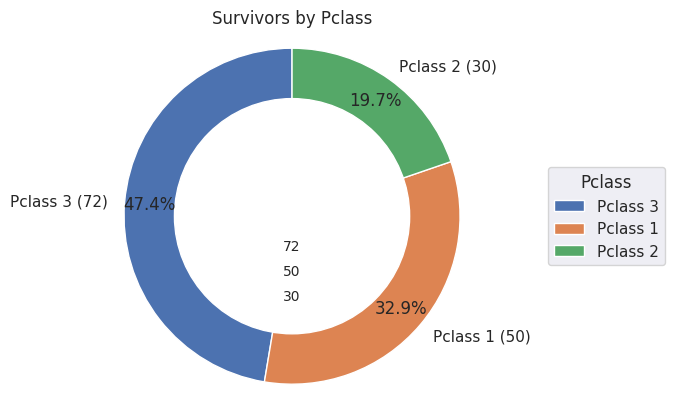

In [244]:
survived_by_pclass = df[df['Survived'] == 1]['Pclass'].value_counts()

plt.pie(survived_by_pclass, labels=[f'Pclass {i} ({count})' for i, count in survived_by_pclass.iteritems()],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend([f'Pclass {i}' for i in survived_by_pclass.index], title='Pclass', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

for i, count in enumerate(survived_by_pclass):
    plt.text(0, -0.2 - i*0.15, f'{int(count)}', ha='center', fontsize=10)


plt.title('Survivors by Pclass')
plt.show()

**Data value replacing with numbers**

In [245]:
df.new=df.replace({'Sex':{'male':'0','female':'1'},'Embarked':{'S':'0','C':'1','Q':'2'}})

<ipython-input-245-b067cfad61b6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.new=df.replace({'Sex':{'male':'0','female':'1'},'Embarked':{'S':'0','C':'1','Q':'2'}})


**Separating Features and Target**

In [246]:
X=df.new.drop(columns=['PassengerId', 'Name', 'Ticket'])
Y=df.new['Survived']

In [247]:
print(X)


     Survived  Pclass Sex       Age  SibSp  Parch      Fare Embarked
0           0       3   0  34.50000      0      0    7.8292        2
1           1       3   1  47.00000      1      0    7.0000        0
2           0       2   0  62.00000      0      0    9.6875        2
3           0       3   0  27.00000      0      0    8.6625        0
4           1       3   1  22.00000      1      1   12.2875        0
..        ...     ...  ..       ...    ...    ...       ...      ...
413         0       3   0  30.27259      0      0    8.0500        0
414         1       1   1  39.00000      0      0  108.9000        1
415         0       3   0  38.50000      0      0    7.2500        0
416         0       3   0  30.27259      0      0    8.0500        0
417         0       3   0  30.27259      1      1   22.3583        1

[418 rows x 8 columns]


In [248]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


**Training data & testing data**

In [249]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [250]:
print(X.shape,X_train.shape,X_test.shape)

(418, 8) (334, 8) (84, 8)


**Model Training**

Logistics Regression

In [251]:
model = LogisticRegression()

In [252]:
model.fit(X_train,Y_train)

LogisticRegression()

**Model Evaluation**

Accuracy Score

In [253]:
X_train_prediction=model.predict(X_train)

In [254]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [255]:
Training_data_accuracy= accuracy_score(Y_train,X_train_prediction)
print('Accuracy Score of training data: ',Training_data_accuracy)

Accuracy Score of training data:  1.0


In [256]:
X_test_prediction=model.predict(X_test)
Test_data_accuracy= accuracy_score(Y_test,X_test_prediction)
print('Accuracy Score of testing data: ',Test_data_accuracy)

Accuracy Score of testing data:  1.0


**Neighbour Classfier**

In [257]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [258]:
print('Accuracy: ', accuracy_score(Y_test, Y_pred_knn))
print('Precision: ', precision_score(Y_test, Y_pred_knn))
print('Recall: ', recall_score(Y_test, Y_pred_knn))
print('F1 Score: ', f1_score(Y_test, Y_pred_knn))

Accuracy:  0.7261904761904762
Precision:  0.75
Recall:  0.45454545454545453
F1 Score:  0.5660377358490566


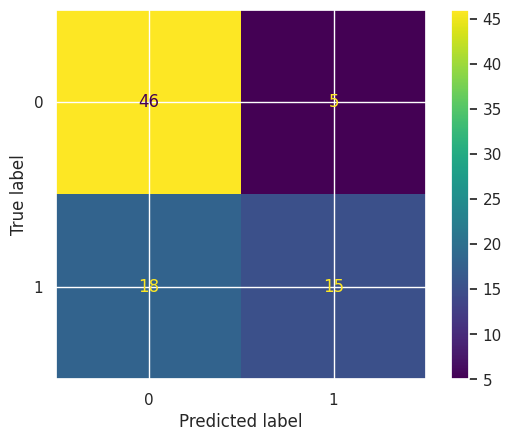

In [260]:
cm = confusion_matrix(Y_test, Y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

In [261]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
y_pred_tree = tree.predict(X_test)

In [262]:
print('Accuracy: ', accuracy_score(Y_test, y_pred_tree))
print('Precision: ', precision_score(Y_test, y_pred_tree))
print('Recall: ', recall_score(Y_test, y_pred_tree))
print('F1 Score: ', f1_score(Y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


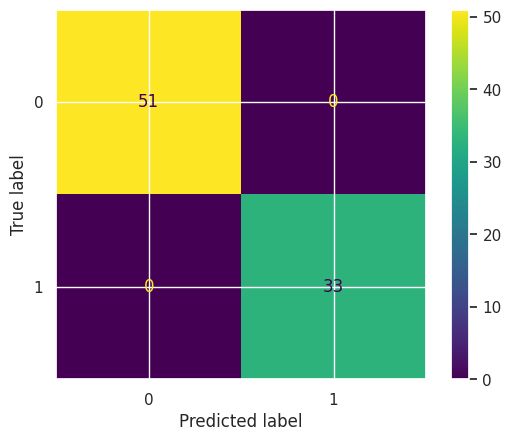

In [263]:
cm = confusion_matrix(Y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

**Summary:**

The treemap visualization indicates that the Decision Tree model achieved perfect accuracy in predicting passenger survival solely based on their gender. This is because all females survived the Titanic disaster, while all males did not.

**Key statistics:**

*   36.36% of passengers survived the Titanic disaster.
*   63.64% of passengers did not survive.

**Gender-based survival:**


*   All females survived.
*   None of the males survived.

**Class-based survival:**

*   Passengers in Class 3 and 2 had a lower chance of survival.


**Model Performance:**
Both the Logistic Regression and Decision Tree models achieved 100% accuracy.

                                                                                **Thank You !!**